# CX1115 Introduction to DSAI Example Class 5
**Problem 1: Predicting CentralAir using SalePrice**<br>
**Problem 2: Predicting CentralAir using Other Variables** 
    "GrLivArea", "OverallQual", "YearBuilt"
    One-by-One to perform individual Binary 
    Classifications and obtain individual univeriate Decision in each case
    Consider all predictor varibales as numeric in case of this classification problem 
    
**Problem 3: Best Uni-Variate Model to Predict CentralAir**
    Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on Both Train and Test Data to comment on which univariate classification tree is the best to predict "CentralAir"

#### Importing Libraries and Setting Up

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
HouseData = pd.read_csv('train.csv')

In [3]:
HouseData.info(max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### For Reference: Information about the Data


**CentralAir:** Central air conditioning

**OverallQual:** Rates the overall material and finish of the house

**YearBuilt:** Original construction date

**GrLivArea:** Above grade (ground) living area square feet

**SalePrice:**: Price of the House

## Problem 1: Predicting SalePrice using GrLivArea (Uni-Variate)
1. Importing the relevant variables: `CentralAir` and `SalePrice`

In this case, 

Response Variable : **CentralAir**     
Predictor Feature : **SalePrice**    

In [4]:
FilteredHouseData = pd.DataFrame(HouseData[['CentralAir','SalePrice']])

In [5]:
FilteredHouseData.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


#### Part a) Plot distribution of Central to check the imbalance of Y against N. Print the ratio of the classes Y:N

In [6]:
FilteredHouseData["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

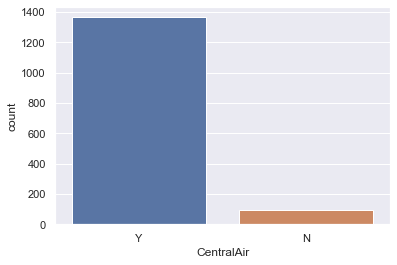

In [7]:
#Count plot for Central Air
sb.countplot(x=FilteredHouseData['CentralAir'])

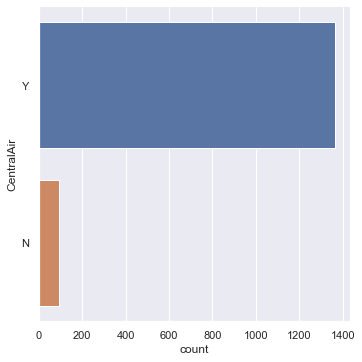

In [8]:
# Cat Plot for Central Air
#the data set is imbalanced
sb.catplot(y = "CentralAir", data = FilteredHouseData, kind = "count")

### Analysising the Central Air Data
From the above data, it is seen that there is a `class imbalance`. There is a significantly lower numebr of houses that contain no `CentralAir` as compared to the number of houses that have `CentralAir`. 

This is a potential cause of incorrect prediction later on when the decision tree is constructed. Decision tree models works in a manner that is bias toward the classification that has more numbers in it. In this case, it will be bias towards the houses that **have** `CentralAir`. This is because the class of **having** `CentralAir` dominates the class of **not** having `CentralAir`.


https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
https://scikit-learn.org/stable/modules/tree.html

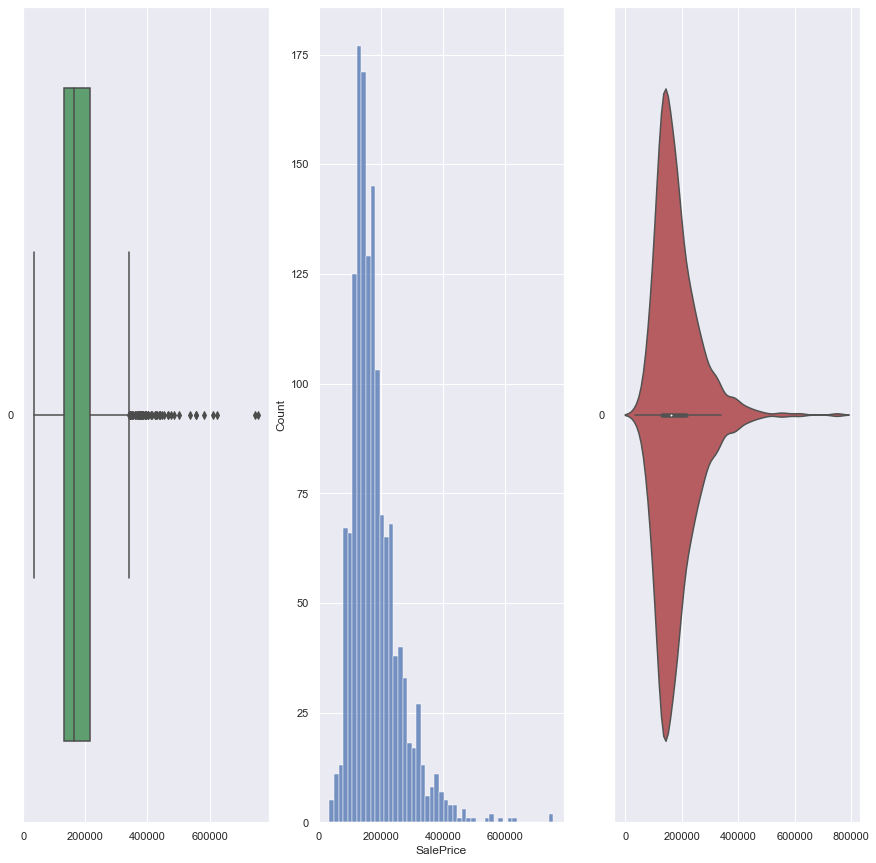

In [9]:
#Get the descriptions and visual representation of the variables 
#Running a for loop 
# For reference 
#create a function

def plot_xvariable(var):
    f, axes = plt.subplots(1, 3, figsize=(15, 15))
    sb.boxplot(data = HouseData[var], orient = "h", ax = axes[0], color='g')
    sb.histplot(data = HouseData[var], ax = axes[1])
    sb.violinplot(data = HouseData[var], orient = "h", ax = axes[2], color='r')


plot_xvariable('SalePrice')

#### Part b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship

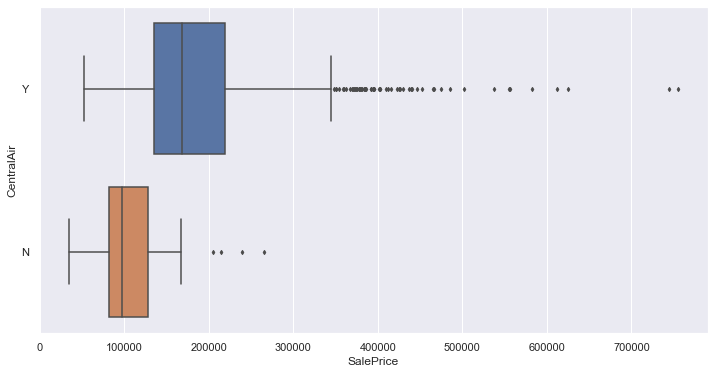

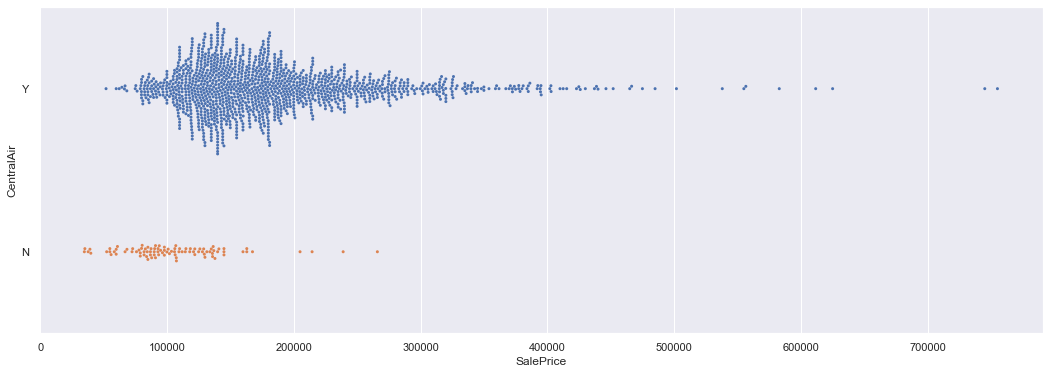

In [10]:
#Cannot use a joint plot due to the visual looks, must use something else
#Merged Boxplot
# Joint Boxplot 
#create a function 

def joint_plot(var):
    f = plt.figure(figsize=(12, 6))
    sb.boxplot(x = var, y = "CentralAir", data = HouseData, orient = "h", fliersize=3)
    f = plt.figure(figsize=(18, 6))
    sb.swarmplot(x = var, y = "CentralAir", data = HouseData, orient = "h", size = 3)
    
joint_plot('SalePrice')

***
### Analysis of the Sale Price in predicting CentralAir
Here the **interquartile range** of the class **having** `CentralAir` and the class **not having** `CentralAir` do not intercept. 

This suggests that 50% of the data in the class **having** `CentralAir` and 50% of the data in the class of **not** having `CentralAir` do not share the same SalePrice. 

Additionally, the houses that are priced above approximately 280 000 all have `CentralAir`.

***

#### Part c) Import Classification Tree Model from SciKit-Learn
***
#### Part d) Partition the dataset houseData into two "random" portions: 1100 and 360
***
#### Part e) Training: fit a decision tree model on the train dataset to predict the class (y/n) of CentralAir using SalePrice
***
#### Part f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree
***
#### part g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.
***
#### Part h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.
***
#### Part i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.
***
#### Part j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.
***

In [11]:
# Creating a function

def train_and_predict(var):
    #part c) Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import plot_tree
    
    # Recall the CentralAir-Var Dataset, the variable will be passed accordingly
    X_variable = pd.DataFrame(HouseData[var])   # Response
    Y_variable = pd.DataFrame(HouseData['CentralAir'])       # Predictor

    # Part d) Split the CentralAir-Var Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X_variable, Y_variable, test_size = 360/(1100+360))

    # Part e) Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model
    
    
    # Part f) visualise the decision tree
    from sklearn.tree import export_graphviz
    treedot = export_graphviz(dectree, 
                         feature_names = X_train.columns, 
                         out_file = None, 
                         filled = True, 
                         rounded = True, 
                         special_characters = True,class_names= ["No Central Air", "Central Air"])
    import graphviz
    from IPython.display import display
    display(graphviz.Source(treedot))



    # part g) Predict Central Air values corresponding to var_train and plot the two-way confusion matrix
    y_train_pred = dectree.predict(X_train)
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.show()
    
    
     
  
    # part h) Check the Goodness of Fit (on Train Data)
    # true positive rate = tp/(tp+fp)
    # false positive rate = fp/(tp+fp) = 1 - TPR
    # true negative rate = tn/(tn+fn)
    print("Goodness of Fit of Model \tTrain Dataset")
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    TN = confusion_matrix_train[0,0]
    TP = confusion_matrix_train[1,1]
    FP = confusion_matrix_train[0,1]
    FN = confusion_matrix_train[1,0]
    print("True Negative Rate: ", TN/(TN+FP))
    print("True Positive Rate: ", TP/(TP+FN))
    print("False Negative Rate: ", FN/(FN+TP))
    print("False Positive Rate: ", FP/(TN+FP))
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    
    
    #Part i) predict CentralAir for test data 
    y_test_pred = dectree.predict(X_test)
    
    # Plot the Confusion Matrix for Train and Test
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.show()
    
    # part j) Check the Goodness of Fit (on Test Data)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    print("Goodness of Fit of Model \tTest Dataset")
    TN = confusion_matrix_test[0,0]
    TP = confusion_matrix_test[1,1]
    FP = confusion_matrix_test[0,1]
    FN = confusion_matrix_test[1,0]
    print("True Negative Rate: ", TN/(TN+FP))
    print("True Positive Rate: ", TP/(TP+FN))
    print("False Negative Rate: ",FN/(FN+TP))
    print("False Positive Rate: ", FP/(TN+FP))    
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))

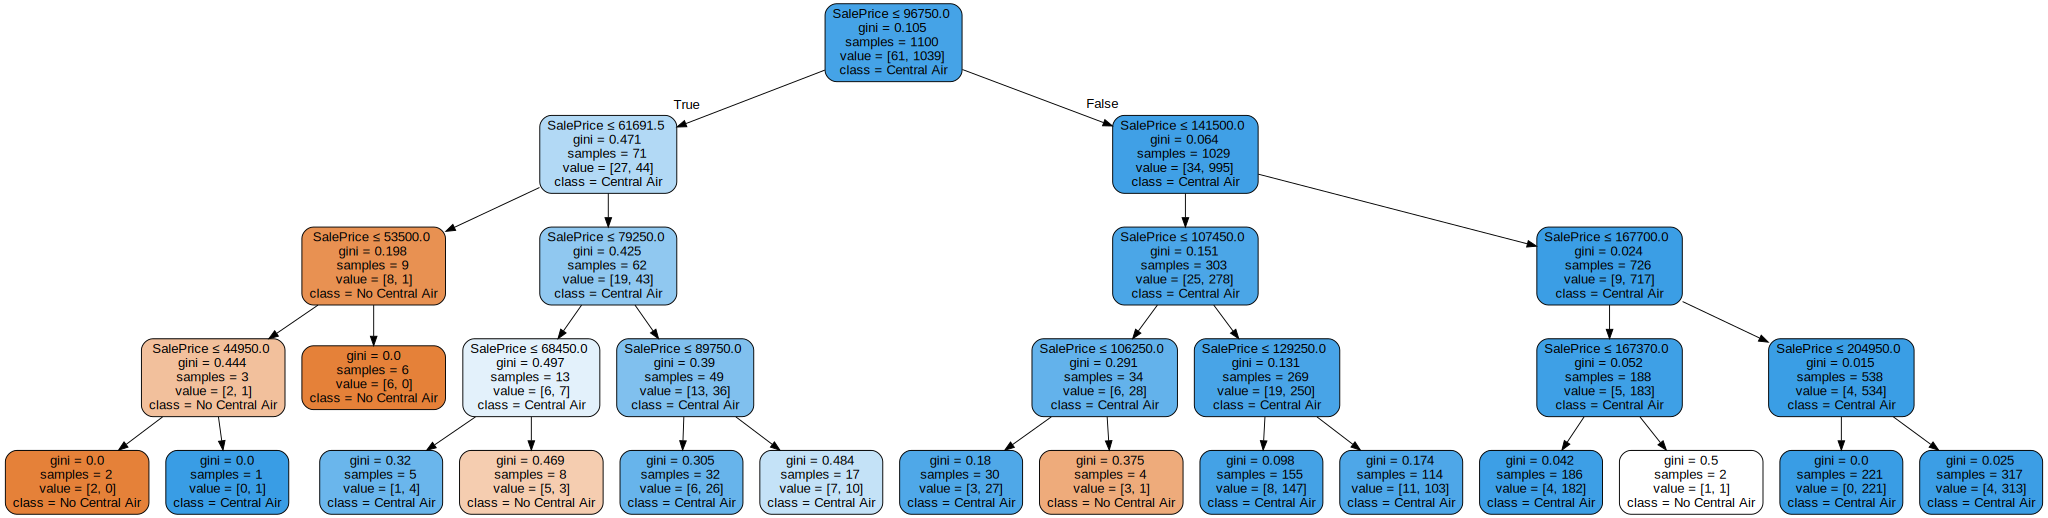

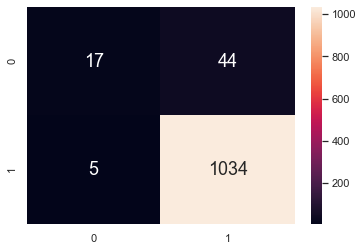

Goodness of Fit of Model 	Train Dataset
True Negative Rate:  0.2786885245901639
True Positive Rate:  0.9951876804619827
False Negative Rate:  0.004812319538017324
False Positive Rate:  0.7213114754098361
Classification Accuracy 	: 0.9554545454545454


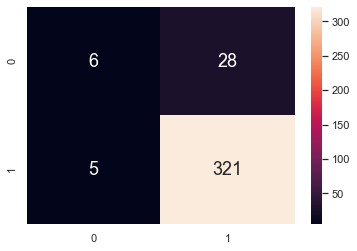

Goodness of Fit of Model 	Test Dataset
True Negative Rate:  0.17647058823529413
True Positive Rate:  0.9846625766871165
False Negative Rate:  0.015337423312883436
False Positive Rate:  0.8235294117647058
Classification Accuracy 	: 0.9083333333333333


In [12]:
train_and_predict('SalePrice')

***
# Problem 2: Do the same for GrLivArea, OverallQual, YearBuilt

***
## Problem 2: Do the same for GrLivArea

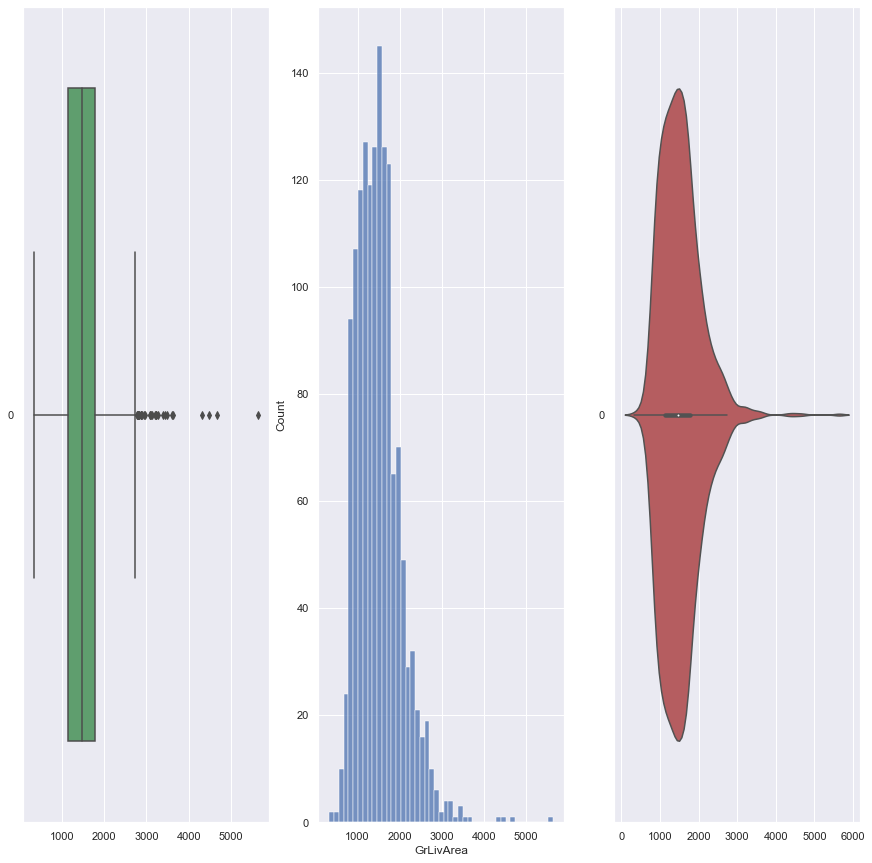

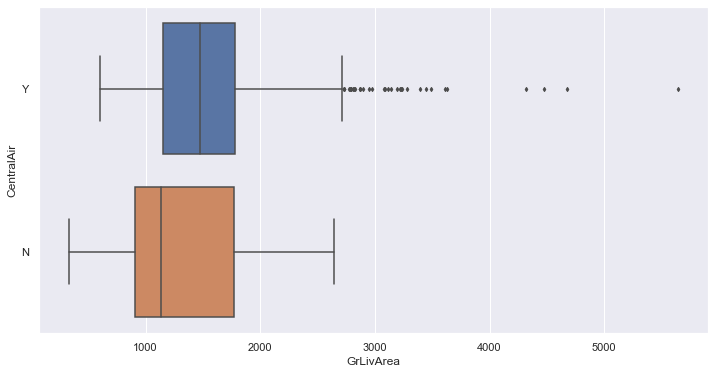

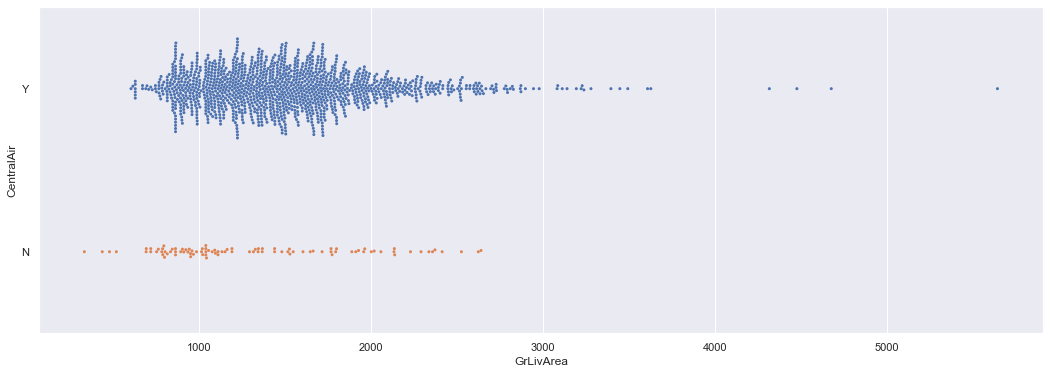

In [13]:
plot_xvariable('GrLivArea')
joint_plot('GrLivArea')

***
### Analysising GrLivArea for predicting CentralAir
Here the **interquartile range** of the class **having** `CentralAir` and the class **not having** `CentralAir` do intercept. 

This suggests that 50% of the data in the class **having** `CentralAir` and 50% of the data in the class of **not** having `CentralAir` can have the same GrLivArea. If houses happen to have the same GrLivArea, there is no clear conclusion whether it could have `CentralAir` or not.  

Only the extreme cases above the 75th percentile in the class having `CentralAir` do not share the same GrLivArea as the class that do not have `CentralAir`. 
***

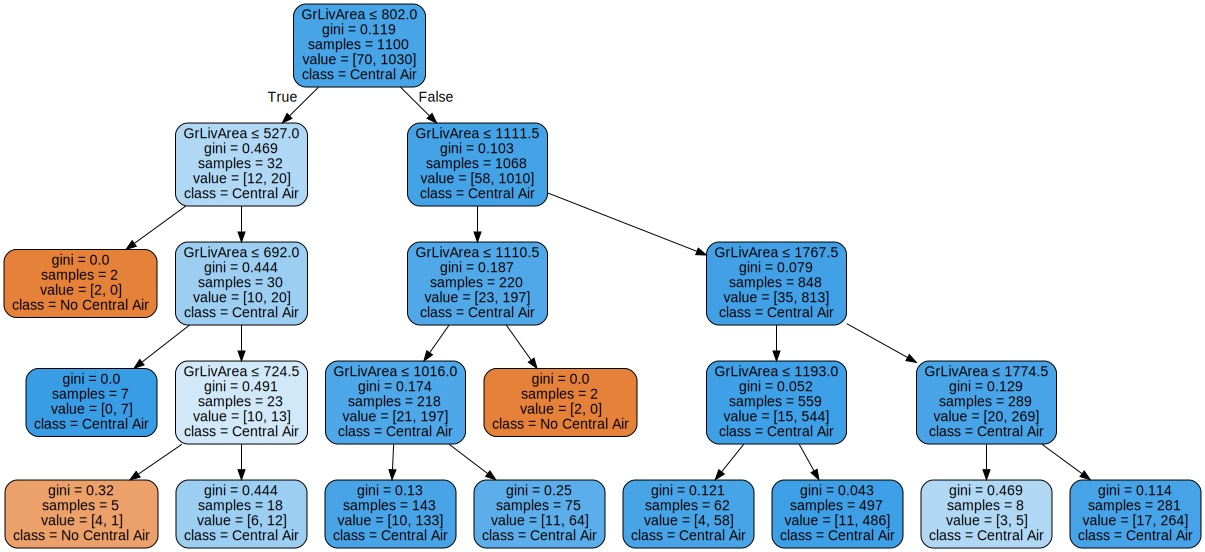

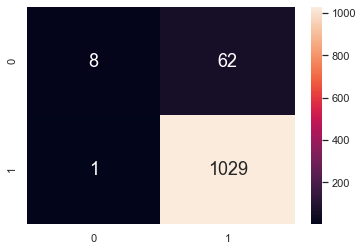

Goodness of Fit of Model 	Train Dataset
True Negative Rate:  0.11428571428571428
True Positive Rate:  0.9990291262135922
False Negative Rate:  0.000970873786407767
False Positive Rate:  0.8857142857142857
Classification Accuracy 	: 0.9427272727272727


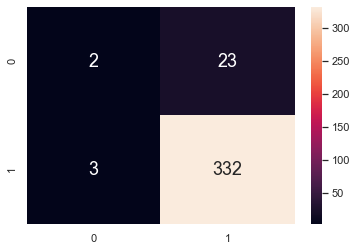

Goodness of Fit of Model 	Test Dataset
True Negative Rate:  0.08
True Positive Rate:  0.991044776119403
False Negative Rate:  0.008955223880597015
False Positive Rate:  0.92
Classification Accuracy 	: 0.9277777777777778


In [14]:
train_and_predict('GrLivArea')

***
## Problem 2: Do the same for OverallQual

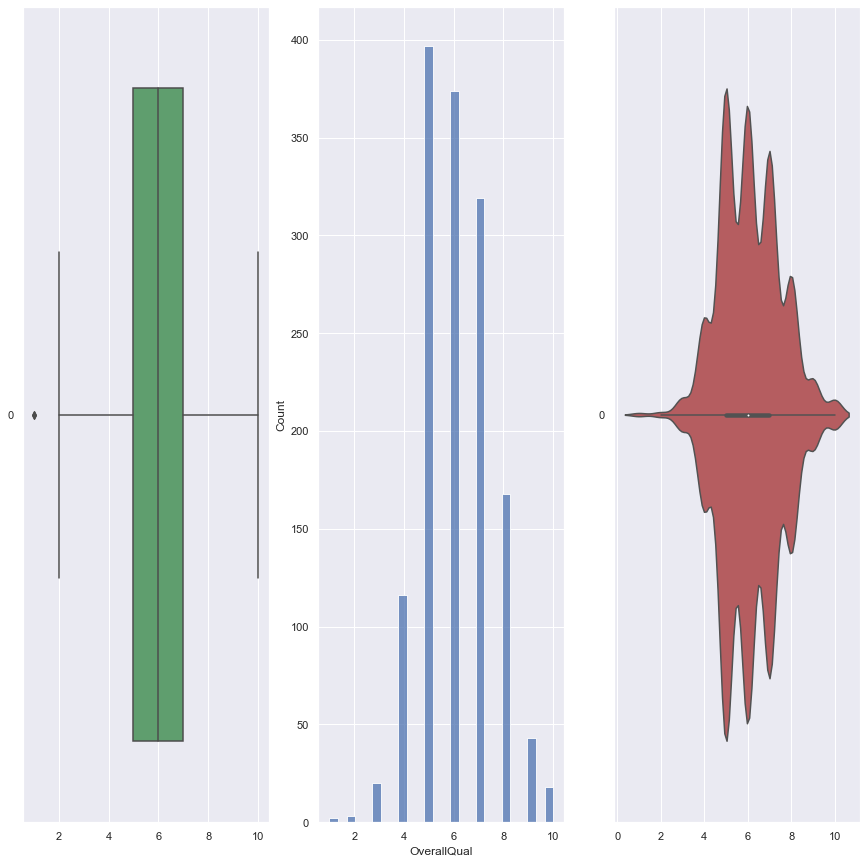

In [15]:
plot_xvariable('OverallQual')

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


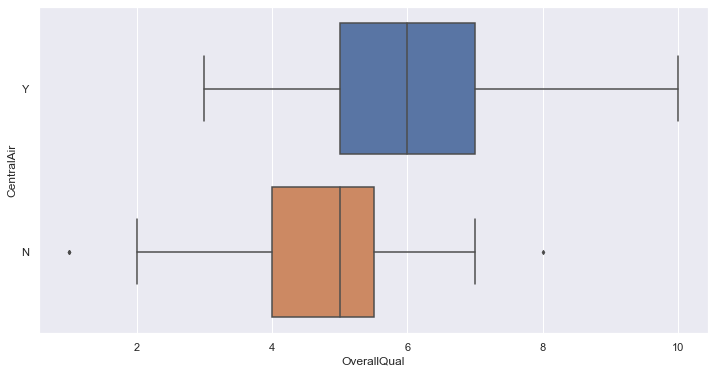

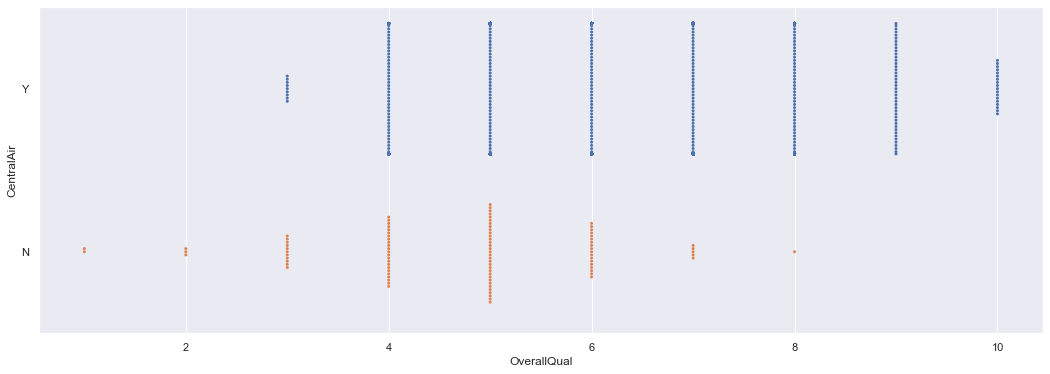

In [16]:
joint_plot('OverallQual')

***
### Analysing OverallQual to predict CentralAir
Here the **interquartile range** of the class **having** `CentralAir` and the class **not having** `CentralAir` do intercept. 

This suggests that 50% of the data in the class **having** `CentralAir` and 50% of the data in the class of **not** having `CentralAir` can have the same `OverallQual`. If houses happen to have the same `OverallQual`, there is no clear conclusion whether it could have `CentralAir` or not.  

Only those that have an `OverQual` of 9 or 10 have houses that only **have** `CentralAir` and only those that have `OverallQual` of 1 and 2 have houses that only **do not** have `CentralAir`. However, between `OverallQual` 3 and 8, it may not be a clear conclusion as to whether the house has `CentralAir` or not. 
***

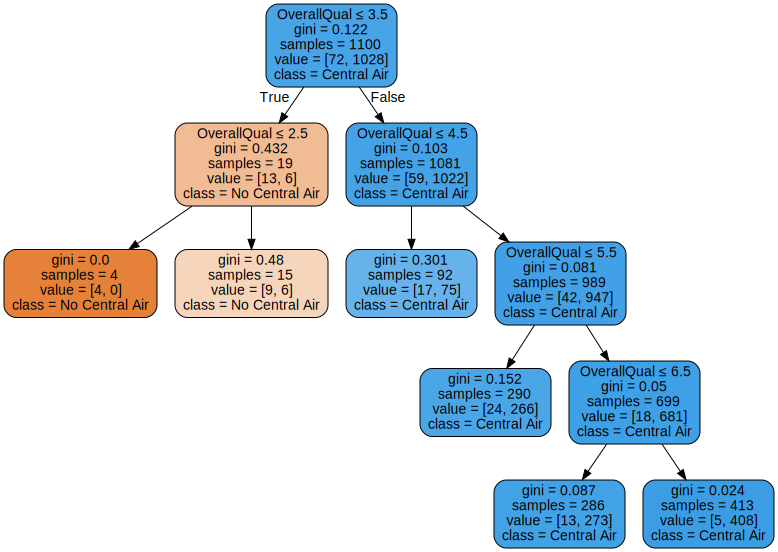

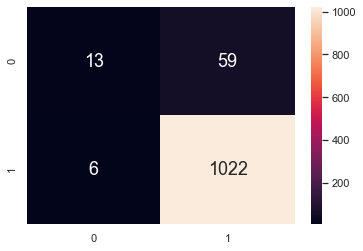

Goodness of Fit of Model 	Train Dataset
True Negative Rate:  0.18055555555555555
True Positive Rate:  0.9941634241245136
False Negative Rate:  0.005836575875486381
False Positive Rate:  0.8194444444444444
Classification Accuracy 	: 0.9409090909090909


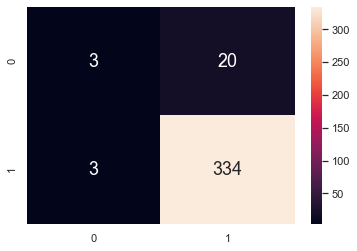

Goodness of Fit of Model 	Test Dataset
True Negative Rate:  0.13043478260869565
True Positive Rate:  0.9910979228486647
False Negative Rate:  0.008902077151335312
False Positive Rate:  0.8695652173913043
Classification Accuracy 	: 0.9361111111111111


In [17]:
train_and_predict('OverallQual')

***
## Problem 2: Do the same for YearBuilt

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


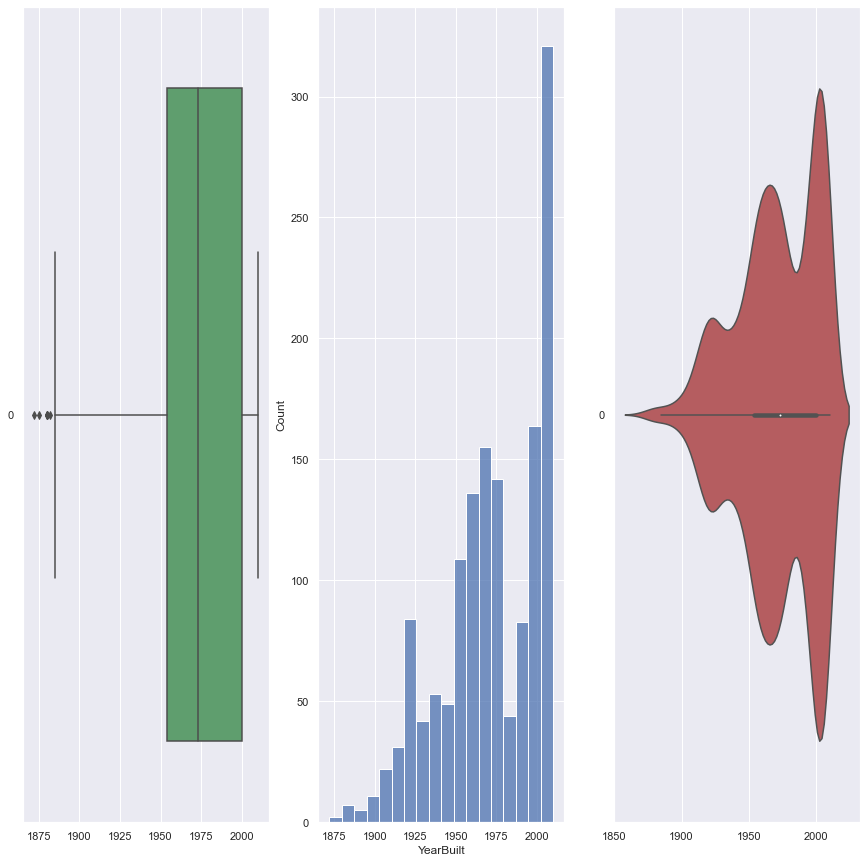

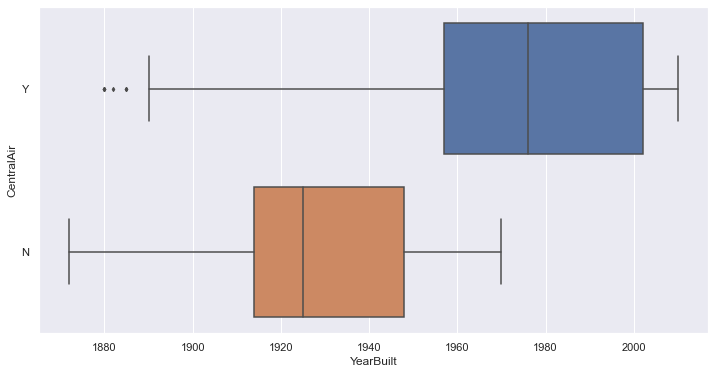

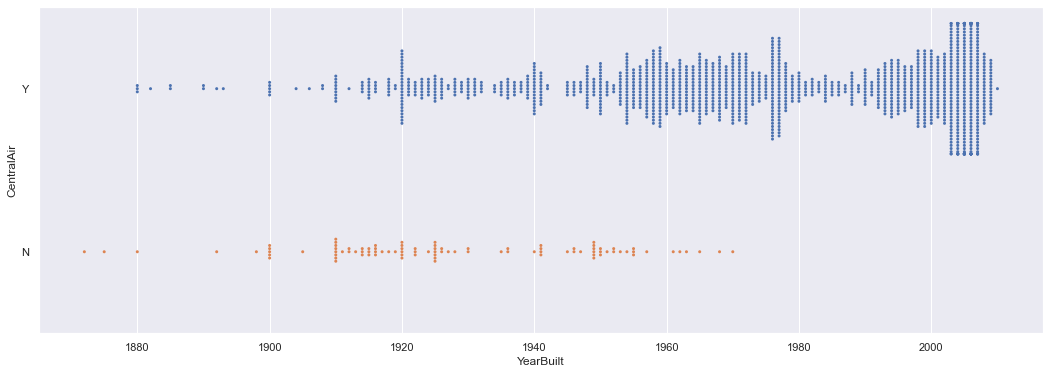

In [18]:
plot_xvariable('YearBuilt')
joint_plot('YearBuilt')

***
### Analysis of the YearBuilt in predicting CentralAir
Here the **interquartile range** of the class **having** `CentralAir` and the class **not having** `CentralAir` do not intercept. 

This suggests that 50% of the data in the class **having** `CentralAir` and 50% of the data in the class of **not** having `CentralAir` do not share the same `YearBuilt`.

Additionally, the houses that are built after approximately 1970 are equiped with `CentralAir`. Hence, if the house is built after 1970, it can be said with full confidence that the house has `CentralAir`. However, if the house was built before 1970, it may not be as certain. 

***

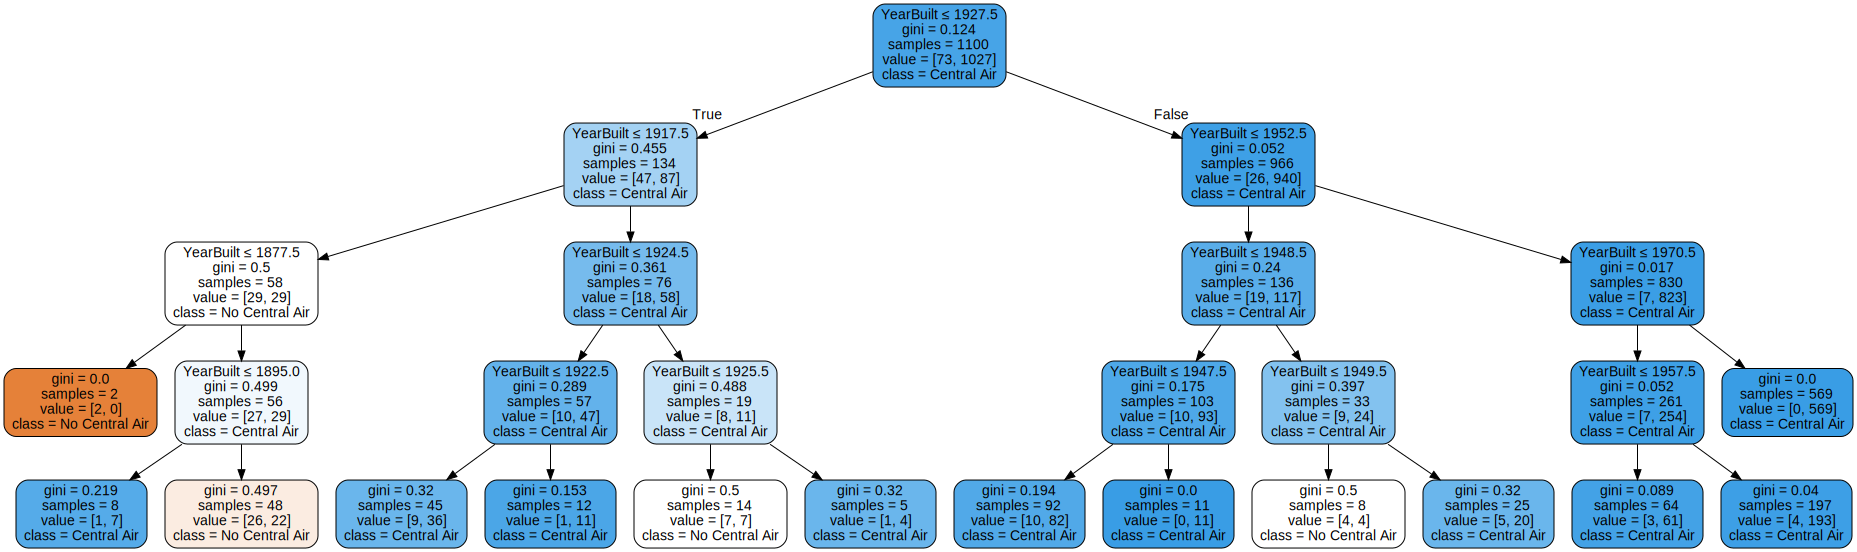

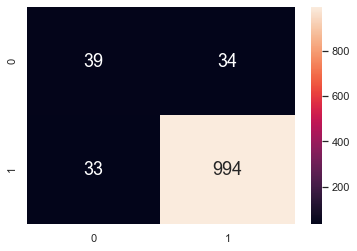

Goodness of Fit of Model 	Train Dataset
True Negative Rate:  0.5342465753424658
True Positive Rate:  0.9678675754625121
False Negative Rate:  0.03213242453748783
False Positive Rate:  0.4657534246575342
Classification Accuracy 	: 0.9390909090909091


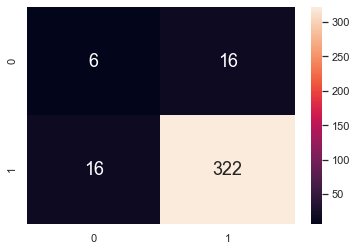

Goodness of Fit of Model 	Test Dataset
True Negative Rate:  0.2727272727272727
True Positive Rate:  0.9526627218934911
False Negative Rate:  0.047337278106508875
False Positive Rate:  0.7272727272727273
Classification Accuracy 	: 0.9111111111111111


In [19]:
train_and_predict('YearBuilt')

***
# Problem 3 Analysis 

## Using a bivariate plot to analyse visually

Using simply the bivariate plot to analyse visually, `SalePrice` and `YearBuilt` area the **best** predictors while `GrLivArea` and `Overallqual` are the worst predictors for Central Air. This is by looking at the interquartile range in the boxplot and the distribution in the swarmplot. 

***
For `SalePrice`, the interquartile range for **not having** `CentralAir` do not intercept with the interquartile range of having `Central Air`. This suggests that the data for houses that have `CentralAir` have a higher cost than houses that **do not** have `Central Air`. 

***

Similarly, for `YearBuilt`, the interquartile range for **not having** `CentralAir` do not intercept with the interquartile range of having `Central Air`. This suggests that the data for houses that have `CentralAir` are generally built later than houses that **do not** have `Central Air`.

***

However, this is not the case for `OverQual` and `GrLivArea`. The interquartile range for having central air and not having central air intercept for both predictors. 

***

If houses happen to have the same GrLivArea, there is no clear conclusion whether it could have `CentralAir` or not. Only the extreme cases above the 75th percentile in the class having `CentralAir` do not share the same GrLivArea as the class that do not have `CentralAir`. 

***

If houses happen to have the same `OverallQual`, there is no clear conclusion whether it could have `CentralAir` or not. Only those that have an `OverQual` of 9 or 10 have houses that only **have** `CentralAir` and only those that have `OverallQual` of 1 and 2 have houses that only **do not** have `CentralAir`. However, between `OverallQual` 3 and 8, it may not be a clear conclusion as to whether the house has `CentralAir` or not. 

***

## Using Classification Accuracy, TP, TN, FP, FN
> **These data is taken from one of the runs of the kernel, values may change if kernel is re-run.** 

Results rounded off to 3 decimal places

### SalePrice
**Goodness of Fit of Model Train Dataset**

True Negative Rate:  0.132

True Positive Rate:  0.998

False Negative Rate:  0.002

False Positive Rate:  0.868

Classification Accuracy : 0.945


**Goodness of Fit of Model Test Dataset**
True Negative Rate:  0.148

True Positive Rate:  1.000

False Negative Rate:  0.000

False Positive Rate:  0.852

Classification Accuracy : 0.936



### GrLivArea
**Goodness of Fit of Model Train Dataset**
True Negative Rate:  0.118

True Positive Rate:  0.996

False Negative Rate:  0.004

False Positive Rate:  0.882

Classification Accuracy : 0.935


**Goodness of Fit of Model 	Test Dataset**
True Negative Rate:  0.105

True Positive Rate:  1.000

False Negative Rate:  0.0000

False Positive Rate:  0.895

Classification Accuracy : 0.953



### OverallQual
**Goodness of Fit of Model Train Dataset**

True Negative Rate:  0.162

True Positive Rate:  0.992

False Negative Rate:  0.008

False Positive Rate:  0.838

Classification Accuracy : 0.936


**Goodness of Fit of Model Test Dataset**

True Negative Rate:  0.190

True Positive Rate:  0.997

False Negative Rate:  0.003

False Positive Rate:  0.810

Classification Accuracy : 0.950



### YearBuilt
**Goodness of Fit of Model Train Dataset**

True Negative Rate:  0.333

True Positive Rate:  0.976

False Negative Rate:  0.024

False Positive Rate:  0.667

Classification Accuracy 	: 0.932



**Goodness of Fit of Model Test Dataset**

True Negative Rate:  0.300

True Positive Rate:  0.968

False Negative Rate:  0.032

False Positive Rate:  0.700

Classification Accuracy 	: 0.931

Looking at the above data, the classification accuracy and true positive for `SalePrice` and `YearBuilt` are the higher than that of `GrLivArea` and `OverQuall`. Hence suggesting that `SalePrice` and `YearBuilt` are better predictors than `GrLivArea` and `OverQuall` for `CentralAir`. 

***

However, false positive rates for all the predictors are quite high. These are what the false positive means based on their predictors: 
1. **Sale Price** Generally, the higher the saleprice the more likely the house has `CentralAir`. Hence the person might end up paying more for the  house even though it does not have `CentralAir`. Hence, the buyer may not be very happy with the prediction model. 

2. **GrLivArea** For this predictor, a false positive may not suggest much since `GrLivArea` does not clearly affect `CentralAir`.

3. **OverallQual** For this predictor, if you have a `OverallQual` of 9 or 10, it suggests clearly that there is `CentralAir`. However, if you get predicted a 7 or 8 `OverallQual` there is a chance of not having `CentralAir` despite the `OverallQual` being high. 

4. **YearBuilt** For this predictor, houses built at approximately after 1970 definitely have `CentralAir`. For this predictor, the false positive is not as high as the rest of the predictors. However, if it is a false positive, one might think that the house has a chance of being relatively newer and has `CentralAir` but it may not have `CentralAir` and could also be a house that was built long time ago. 

***
False negative may not affect the buyer as much. This is because if they is looking for a house, they might be predicted a negative `CentralAir` but in reality enjoys `CentralAir`. However, if the buyer specifically wants a house without `CentralAir` then they might be worse off. 

If a person does not want `CentralAir`, then if the false negative is high and true negative is low, they would be worse off. However, if the buyer does not mind not having or having `CentralAir` and gets predicted that his house does not have `CentralAir`, it would not matter to him whether it is truly negative or a false negative. 
***

### Analysis the Decision Tree

Things Noticed:
1. OverallQual is actually a categorical value type which has numerical values. However, when a decision tree is used, it is treated as a numerical value. Hence the decision tree has values ike 8.5, 2.5 etc. This could be because currently Sklearn does not support categorical variable type. 
2. There is class imbalance hence the decision tree might be bias towards the class that has `CentralAir`.
***

# Using Multivariate Classification
**Predictors**: OveralQual, GrLivArea, YearBuilt, SalePrice <br>
**Response**: CentralAir

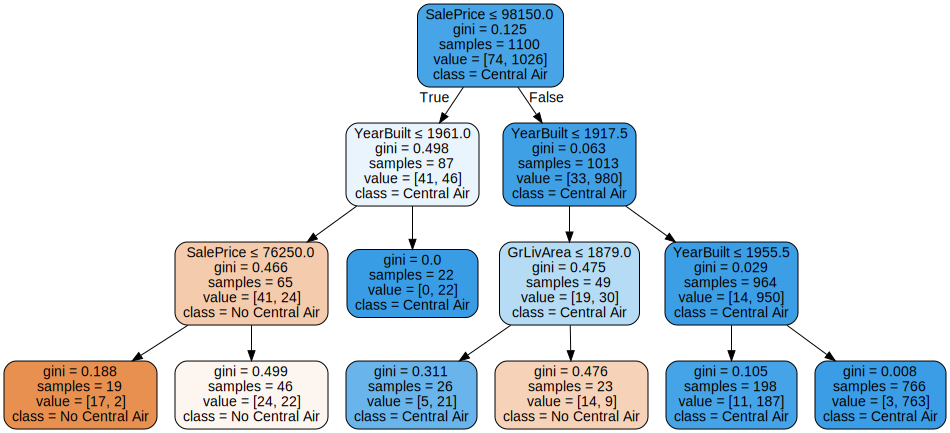

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9527272727272728
True Negative Rate:  0.7432432432432432
True Positive Rate:  0.9678362573099415
False Negative Rate:  0.03216374269005848
False Positive Rate:  0.25675675675675674
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.925
True Negative Rate:  0.38095238095238093
True Positive Rate:  0.9587020648967551
False Negative Rate:  0.04129793510324484
False Positive Rate:  0.6190476190476191


<AxesSubplot:>

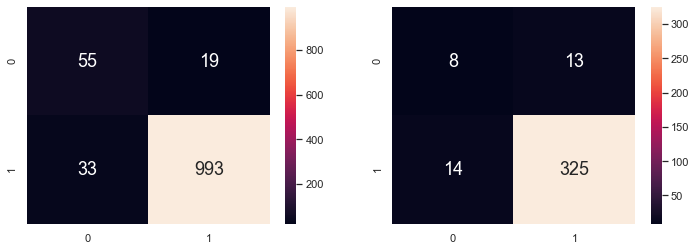

In [20]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(HouseData['CentralAir'])
X = pd.DataFrame(HouseData[["GrLivArea", "SalePrice", "YearBuilt", "OverallQual"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360/(360+1100))

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree, 
                     feature_names = X_train.columns, 
                     out_file = None, 
                     filled = True, 
                     rounded = True, 
                     special_characters = True,class_names= ["No Central Air", "Central Air"])
import graphviz
from IPython.display import display
display(graphviz.Source(treedot))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
TN = confusion_matrix_train[0,0]
TP = confusion_matrix_train[1,1]
FP = confusion_matrix_train[0,1]
FN = confusion_matrix_train[1,0]
print("True Negative Rate: ", TN/(TN+FP))
print("True Positive Rate: ", TP/(TP+FN))
print("False Negative Rate: ", FN/(FN+TP))
print("False Positive Rate: ", FP/(TN+FP))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
TN = confusion_matrix_test[0,0]
TP = confusion_matrix_test[1,1]
FP = confusion_matrix_test[0,1]
FN = confusion_matrix_test[1,0]
print("True Negative Rate: ", TN/(TN+FP))
print("True Positive Rate: ", TP/(TP+FN))
print("False Negative Rate: ",FN/(FN+TP))
print("False Positive Rate: ", FP/(TN+FP))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

***
## Analysis of MultiVariate Classification
**Goodness of Fit of Model 	Train Dataset**<br>
Classification Accuracy 	: 0.9509090909090909 <br>
True Negative Rate:  0.3611111111111111 <br>
True Positive Rate:  0.9922178988326849 <br>
False Negative Rate:  0.007782101167315175 <br>
False Positive Rate:  0.6388888888888888 <br>


**Goodness of Fit of Model 	Test Dataset**<br>
Classification Accuracy 	: 0.9333333333333333 <br>
True Negative Rate:  0.30434782608695654 <br>
True Positive Rate:  0.9762611275964391 <br>
False Negative Rate:  0.02373887240356083 <br>
False Positive Rate:  0.6956521739130435 <br>

***
When multiple variables are used, the false positive rate reduces. This suggests that it is better to use multiple variables to predict `CentralAir`. 